In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
!ls ../data/csv/

100k_synthea_covid19_csv  imaging_studies.csv  payers.csv
allergies.csv		  immunizations.csv    payer_transitions.csv
careplans.csv		  medications.csv      procedures.csv
conditions.csv		  observations.csv     providers.csv
devices.csv		  organizations.csv    supplies.csv
encounters.csv		  patients.csv


# Load all data at once

In [37]:
conditions = pd.read_csv("../data/csv/conditions.csv")
patients = pd.read_csv("../data/csv/patients.csv")
observations = pd.read_csv("../data/csv/observations.csv")
#care_plans = pd.read_csv("../data/csv/careplans.csv")
encounters = pd.read_csv("../data/csv/encounters.csv")
devices = pd.read_csv("../data/csv/devices.csv")
#supplies = pd.read_csv('../data/csv/supplies.csv')
procedures = pd.read_csv("../data/csv/procedures.csv")
medications = pd.read_csv("../data/csv/medications.csv")

# Patients

In [66]:
print('Number of patients:', patients.shape)

# convert birthdate to datetime
patients['BIRTHDATE'] = pd.to_datetime(patients['BIRTHDATE'])

# calculate age
patients['AGE'] = patients['BIRTHDATE'].apply(lambda x : (datetime.now().year - x.year))

patients.head(3)

Number of patients: (124150, 25)


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,AGE
0,1ff7f10f-a204-4bb1-aa72-dd763fa99482,2017-08-24,NaN,999-68-6630,NaN,NaN,NaN,Jacinto644,Kris249,NaN,NaN,NaN,white,nonhispanic,M,Beverly Massachusetts US,888 Hickle Ferry Suite 38,Springfield,Massachusetts,Hampden County,1106.0,42.151961,-72.598959,8446.49,1499.08,5
1,9bcf6ed5-d808-44af-98a0-7d78a29ede72,2016-08-01,NaN,999-15-5895,NaN,NaN,NaN,Alva958,Krajcik437,NaN,NaN,NaN,white,nonhispanic,F,Boston Massachusetts US,1048 Skiles Trailer,Walpole,Massachusetts,Norfolk County,2081.0,42.177370,-71.281353,94568.40,1870.72,6
2,5163c501-353c-4a82-b863-a3f1df2d6cf1,2004-01-09,NaN,999-73-2461,S99999063,NaN,NaN,Jimmie93,Harris789,NaN,NaN,NaN,white,nonhispanic,F,Worcester Massachusetts US,201 Mitchell Lodge Unit 67,Pembroke,Massachusetts,Plymouth County,NaN,42.075292,-70.757035,375754.62,3131.44,18


<AxesSubplot:>

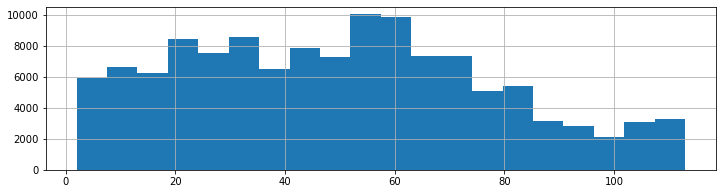

In [20]:
patients['AGE'].hist(bins=20, figsize=(12,3))

# Load conditions/diagnoses/problem list

In [10]:
print('Number of conditions:',conditions.shape)
conditions.head(3)

Number of conditions: (1143900, 6)


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2019-02-15,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,d317dacb-d801-4136-be7d-440094f7ae83,65363002,Otitis media
1,2019-10-30,2020-01-30,1ff7f10f-a204-4bb1-aa72-dd763fa99482,759cfd9c-b40b-45df-a5b2-fca418027a6a,65363002,Otitis media
2,2020-03-01,2020-03-30,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,386661006,Fever (finding)


In [11]:
# get top 10 conditions
conditions['DESCRIPTION'].value_counts()[:20]

Suspected COVID-19                         91039
COVID-19                                   88166
Fever (finding)                            80865
Cough (finding)                            61710
Body mass index 30+ - obesity (finding)    50206
Loss of taste (finding)                    46121
Prediabetes                                38801
Anemia (disorder)                          35972
Fatigue (finding)                          34951
Hypertension                               32560
Sputum finding (finding)                   30653
Chronic sinusitis (disorder)               26739
Miscarriage in first trimester             21736
Pneumonia (disorder)                       18177
Hypoxemia (disorder)                       18177
Respiratory distress (finding)             18177
Dyspnea (finding)                          17939
Wheezing (finding)                         17939
Viral sinusitis (disorder)                 16135
Hyperlipidemia                             15404
Name: DESCRIPTION, d

# Select a condition
Choose a condition from this list: https://github.com/synthetichealth/synthea/wiki/Module-Gallery

In [38]:
# select a condition and get patients and dates associated with one of these conditions
condition = 'Chronic congestive heart failure (disorder)'
conditions.loc[conditions['DESCRIPTION']==condition].head(10)

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
742,2008-09-12,NaN,8742348d-72b0-40b3-a970-08e50b30e256,80c2fa96-0258-45f6-9ae7-de0e6657b118,88805009,Chronic congestive heart failure (disorder)
1644,2005-04-18,NaN,a06df52a-f0a5-459a-9875-972cb2d558b5,1f44f269-8e86-4f86-86d5-fa7a6148486e,88805009,Chronic congestive heart failure (disorder)
1855,2001-07-19,NaN,03533487-733a-49a7-83ca-306c3bd8a792,0a1695a5-4600-4ad9-a78c-42f39b53e50b,88805009,Chronic congestive heart failure (disorder)
2048,2019-02-05,NaN,4c0ba910-3cd0-46ad-a3b8-186e033f091b,991bad9b-d0b1-42fb-9977-2e52abbb5e9e,88805009,Chronic congestive heart failure (disorder)
2250,1987-06-15,NaN,c73b953b-1bf7-4bff-a72c-ba2701d2215a,a74817a4-3f4e-46b9-8e3a-dffe8327ae66,88805009,Chronic congestive heart failure (disorder)
2396,2008-05-20,NaN,23ae1fe6-fddb-4b37-be63-1179436923d0,f33285c3-e102-4575-8db4-038d1a8d3e5a,88805009,Chronic congestive heart failure (disorder)
2823,2000-05-22,NaN,09f19aaf-73d1-4535-b8e8-6a05a2c92408,835a2dc7-0d17-4952-9261-c62f89941810,88805009,Chronic congestive heart failure (disorder)
3064,2019-05-18,NaN,076f1562-f4cd-487e-954f-04dba0df8285,73e66100-1544-4660-90ff-b5776d1730a3,88805009,Chronic congestive heart failure (disorder)
3133,2005-01-16,NaN,77b861bc-5098-4f09-a7f1-b7de5c6c704d,36e0c9d3-e426-45c2-9759-19377bc53f74,88805009,Chronic congestive heart failure (disorder)
3202,1995-12-28,NaN,7682a5b1-0a4f-453f-8f8c-d4d6d0c0975e,6636d202-2bce-4275-a2b1-703583c12673,88805009,Chronic congestive heart failure (disorder)


# Select a patient with your selected condition and look at all data for that one patient

In [59]:
# select a patient from those with the condition
patient = conditions.loc[conditions['DESCRIPTION']==condition]['PATIENT'].values[3]

patients.loc[patients['Id']==patient]

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
232,4c0ba910-3cd0-46ad-a3b8-186e033f091b,1962-01-31,NaN,999-91-6366,S99964399,X77845331X,Mrs.,Connie24,Sporer811,NaN,Okuneva707,M,white,nonhispanic,F,Ashland Massachusetts US,588 Gleichner Row Suite 91,Norfolk,Massachusetts,Norfolk County,NaN,42.1425,-71.288062,1298420.72,5832.8


In [57]:
print('Number of conditions for this patient:', conditions.loc[conditions['PATIENT']==patient].shape[0])
conditions.loc[conditions['PATIENT']==patient]

Number of conditions for this patient: 15


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
2043,1977-03-09,NaN,4c0ba910-3cd0-46ad-a3b8-186e033f091b,c477a09f-1737-448f-aab8-b33ae36900fb,162864005,Body mass index 30+ - obesity (finding)
2044,1993-04-14,NaN,4c0ba910-3cd0-46ad-a3b8-186e033f091b,639cc7af-3f2e-492f-bc3a-4821068771ee,15777000,Prediabetes
2045,1993-04-14,NaN,4c0ba910-3cd0-46ad-a3b8-186e033f091b,639cc7af-3f2e-492f-bc3a-4821068771ee,271737000,Anemia (disorder)
2046,1993-09-11,NaN,4c0ba910-3cd0-46ad-a3b8-186e033f091b,b5ca06c4-b097-4ed9-a48b-a89a80d8be9a,40055000,Chronic sinusitis (disorder)
2047,2017-01-24,NaN,4c0ba910-3cd0-46ad-a3b8-186e033f091b,89b8196f-45c7-4582-bdfb-796a834eabea,83664006,Idiopathic atrophic hypothyroidism
2048,2019-02-05,NaN,4c0ba910-3cd0-46ad-a3b8-186e033f091b,991bad9b-d0b1-42fb-9977-2e52abbb5e9e,88805009,Chronic congestive heart failure (disorder)
2049,2020-03-03,2020-04-02,4c0ba910-3cd0-46ad-a3b8-186e033f091b,8f30668a-76f8-483b-b5e4-e52967e95e19,68235000,Nasal congestion (finding)
2050,2020-03-03,2020-04-02,4c0ba910-3cd0-46ad-a3b8-186e033f091b,8f30668a-76f8-483b-b5e4-e52967e95e19,25064002,Headache (finding)
2051,2020-03-03,2020-04-02,4c0ba910-3cd0-46ad-a3b8-186e033f091b,8f30668a-76f8-483b-b5e4-e52967e95e19,49727002,Cough (finding)
2052,2020-03-03,2020-04-02,4c0ba910-3cd0-46ad-a3b8-186e033f091b,8f30668a-76f8-483b-b5e4-e52967e95e19,267036007,Dyspnea (finding)


In [58]:
print('Number of observations for this patient:', observations.loc[observations['PATIENT']==patient].shape[0])
observations.loc[observations['PATIENT']==patient]

Number of observations for this patient: 43


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
31168,2020-02-21,4c0ba910-3cd0-46ad-a3b8-186e033f091b,15a0a75d-6485-48b4-b8d1-2820270aefe0,10230-1,Left ventricular Ejection fraction,37.2,%,numeric
31169,2020-02-21,4c0ba910-3cd0-46ad-a3b8-186e033f091b,15a0a75d-6485-48b4-b8d1-2820270aefe0,10230-1,Left ventricular Ejection fraction,32.6,%,numeric
31170,2020-03-03,4c0ba910-3cd0-46ad-a3b8-186e033f091b,8f30668a-76f8-483b-b5e4-e52967e95e19,8310-5,Body temperature,37.8,Cel,numeric
31171,2020-03-03,4c0ba910-3cd0-46ad-a3b8-186e033f091b,8f30668a-76f8-483b-b5e4-e52967e95e19,9279-1,Respiratory rate,29.7,/min,numeric
31172,2020-03-03,4c0ba910-3cd0-46ad-a3b8-186e033f091b,8f30668a-76f8-483b-b5e4-e52967e95e19,8867-4,Heart rate,136.2,/min,numeric
31173,2020-03-03,4c0ba910-3cd0-46ad-a3b8-186e033f091b,8f30668a-76f8-483b-b5e4-e52967e95e19,2708-6,Oxygen saturation in Arterial blood,84.4,%,numeric
31174,2020-03-03,4c0ba910-3cd0-46ad-a3b8-186e033f091b,8f30668a-76f8-483b-b5e4-e52967e95e19,8462-4,Diastolic Blood Pressure,74.0,mm[Hg],numeric
31175,2020-03-03,4c0ba910-3cd0-46ad-a3b8-186e033f091b,8f30668a-76f8-483b-b5e4-e52967e95e19,8480-6,Systolic Blood Pressure,119.0,mm[Hg],numeric
31176,2020-03-03,4c0ba910-3cd0-46ad-a3b8-186e033f091b,8f30668a-76f8-483b-b5e4-e52967e95e19,29463-7,Body Weight,78.6,kg,numeric
31177,2020-03-03,4c0ba910-3cd0-46ad-a3b8-186e033f091b,8f30668a-76f8-483b-b5e4-e52967e95e19,92142-9,Influenza virus A RNA [Presence] in Respirator...,Negative (qualifier value),NaN,text


In [54]:
print('Number of total encounters:',encounters.shape[0])
print('Number of encounters for this patient:', encounters.loc[encounters['PATIENT']==patient].shape[0])
encounters.loc[encounters['PATIENT']==patient].head(3)

Number of total encounters: 3188675
Number of encounters for this patient: 9


,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
3922,c477a09f-1737-448f-aab8-b33ae36900fb,1977-03-09T20:44:46Z,1977-03-09T21:14:46Z,4c0ba910-3cd0-46ad-a3b8-186e033f091b,819a27bd-81d7-3aec-b990-e79062cd0fd0,713709b3-615a-3604-b1a0-1b86e4768d99,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,wellness,410620009,Well child visit (procedure),129.16,129.16,74.16,NaN,NaN
3923,639cc7af-3f2e-492f-bc3a-4821068771ee,1993-04-14T20:44:46Z,1993-04-14T21:14:46Z,4c0ba910-3cd0-46ad-a3b8-186e033f091b,819a27bd-81d7-3aec-b990-e79062cd0fd0,713709b3-615a-3604-b1a0-1b86e4768d99,d47b3510-2895-3b70-9897-342d681c769d,wellness,162673000,General examination of patient (procedure),129.16,129.16,49.16,NaN,NaN
3924,b5ca06c4-b097-4ed9-a48b-a89a80d8be9a,1993-09-11T20:44:46Z,1993-09-11T20:59:46Z,4c0ba910-3cd0-46ad-a3b8-186e033f091b,3bd5eda0-16da-3ba5-8500-4dfd6ae118b8,7b23db63-1dcb-38c0-890b-81fc2df959e0,d47b3510-2895-3b70-9897-342d681c769d,ambulatory,185345009,Encounter for symptom,129.16,129.16,49.16,75498004.0,Acute bacterial sinusitis (disorder)


In [55]:
print('Number of total procedures:',procedures.shape[0])
print('Number of procedures for this patient:', procedures.loc[procedures['PATIENT']==patient].shape[0])
procedures.loc[procedures['PATIENT']==patient]

Number of total procedures: 979564
Number of procedures for this patient: 3


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
2086,2020-02-21,4c0ba910-3cd0-46ad-a3b8-186e033f091b,15a0a75d-6485-48b4-b8d1-2820270aefe0,434158009,Transthoracic three dimensional ultrasonograph...,893.71,NaN,NaN
2087,2020-03-03,4c0ba910-3cd0-46ad-a3b8-186e033f091b,8f30668a-76f8-483b-b5e4-e52967e95e19,261352009,Face mask (physical object),516.65,840544004.0,Suspected COVID-19
2088,2020-03-18,4c0ba910-3cd0-46ad-a3b8-186e033f091b,70d0e096-2fb2-474e-8f58-fe3d14b45c1f,430193006,Medication Reconciliation (procedure),374.89,NaN,NaN


In [56]:
print('Number of total medications:',medications.shape[0])
print('Number of medications for this patient:', medications.loc[medications['PATIENT']==patient].shape[0])
medications.loc[medications['PATIENT']==patient]['DESCRIPTION'].value_counts()

Number of total medications: 4227723
Number of medications for this patient: 3


Levothyroxine Sodium 0.075 MG Oral Tablet                                  1
24 HR metoprolol succinate 100 MG Extended Release Oral Tablet [Toprol]    1
Furosemide 40 MG Oral Tablet                                               1
Name: DESCRIPTION, dtype: int64

# Explore variables that could be related to your selected condition

<AxesSubplot:>

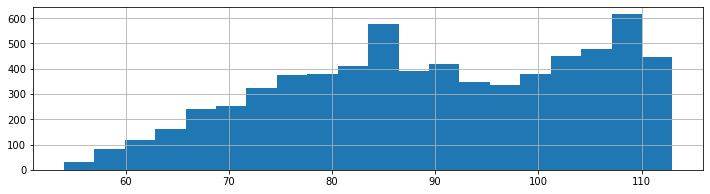

In [67]:
# Plot the age distribution for your condition
patients.loc[patients['Id'].isin(conditions.loc[conditions['DESCRIPTION']==condition]['PATIENT'])]['AGE'].hist(bins=20, figsize=(12,3))

<AxesSubplot:xlabel='GENDER', ylabel='count'>

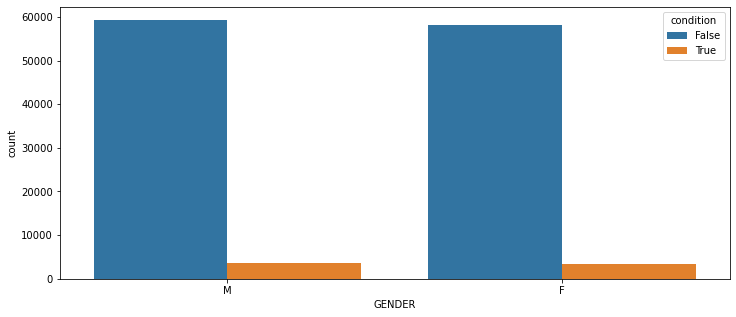

In [78]:
# Plot the gender distribution for your condition
tmp = patients[['Id','GENDER']]
tmp = tmp.merge(conditions.loc[conditions['DESCRIPTION']==condition][['PATIENT','START']], left_on='Id', right_on='PATIENT', how='left')
tmp = tmp.rename(columns={'START': 'condition'})
tmp['condition'] = tmp['condition'].notnull()
plt.figure(figsize=(12,5))
sns.countplot(data=tmp, x='GENDER', hue='condition')

In [ ]:
chf
age
'Left ventricular Ejection fraction'
'shortness of breath'
'exercise intolerance'
lab:NT-proBNP 200-2000